# Importing Libraries

In [8]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from PIL import Image
from tensorflow.keras.optimizers import Adam

# Assigning Path for Dataset

In [9]:
data_dir = 'C:/Users/hp/Desktop/Projects/Python-Project-Traffic-Sign-Classification/Traffic sign classification/'
train_path = 'C:/Users/hp/Desktop/Projects/Python-Project-Traffic-Sign-Classification/Traffic sign classification/Train'
test_path = 'C:/Users/hp/Desktop/Projects/Python-Project-Traffic-Sign-Classification/Traffic sign classification/Test'
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

# Label Overview

In [10]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

# Visualizing The Dataset

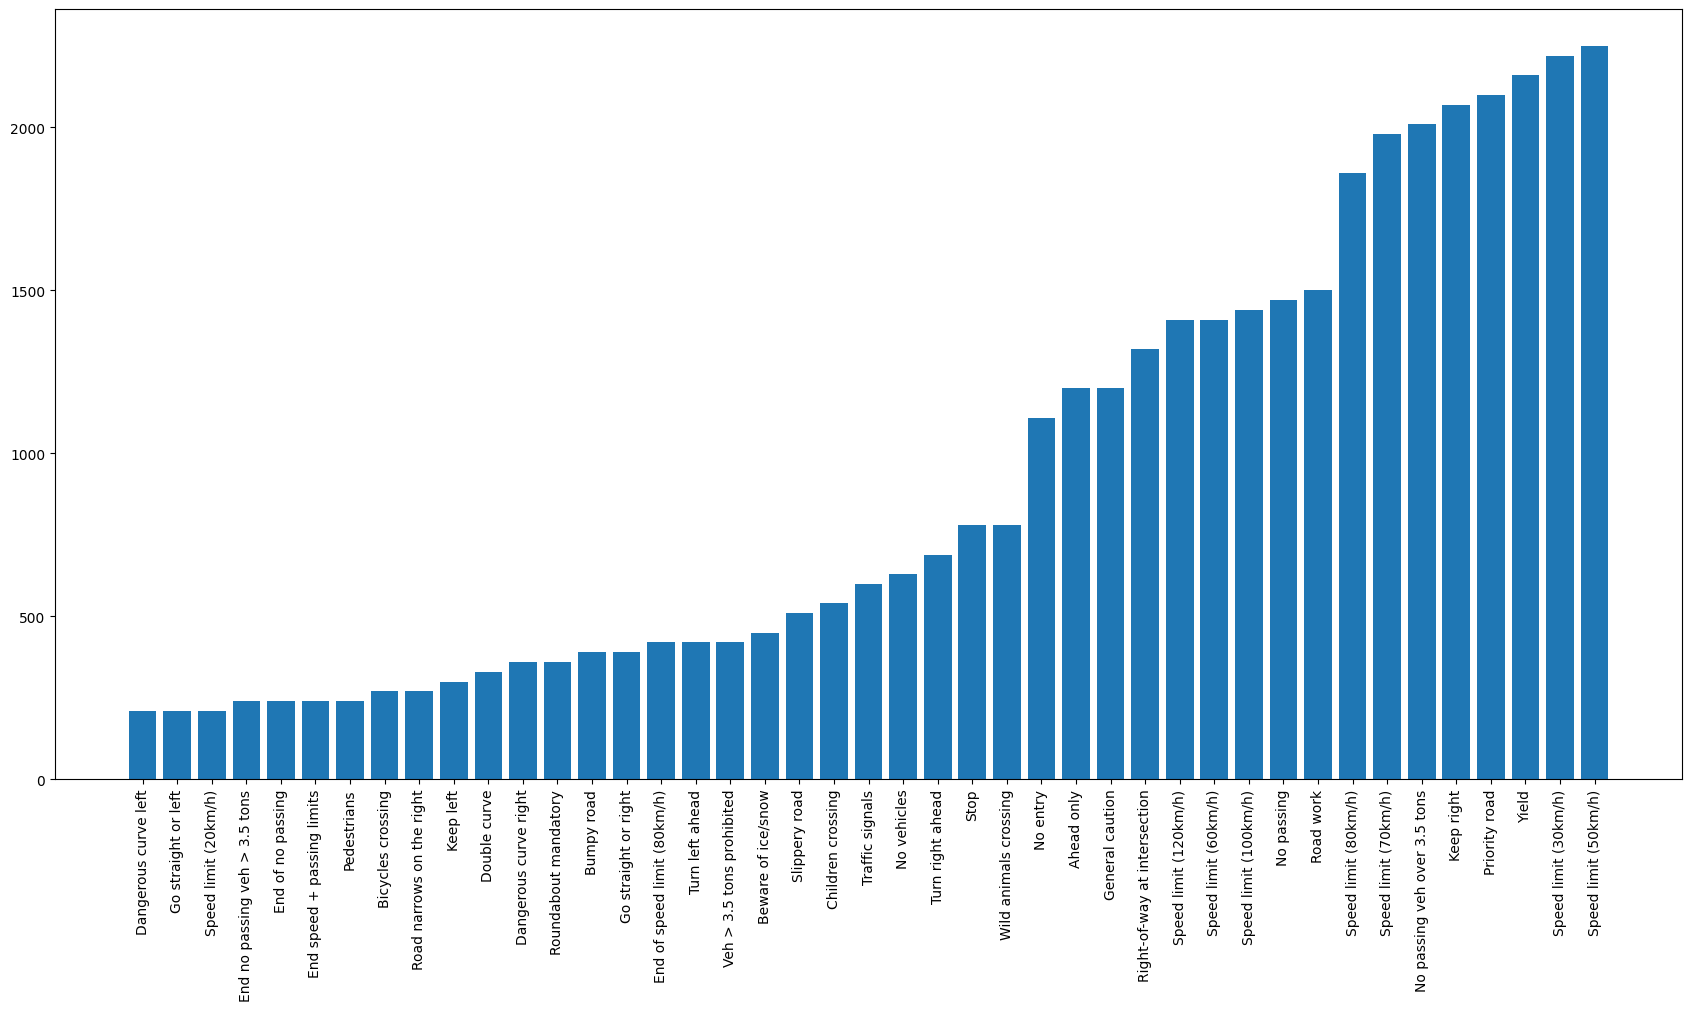

In [11]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

# Visualizing 25 random images from test data

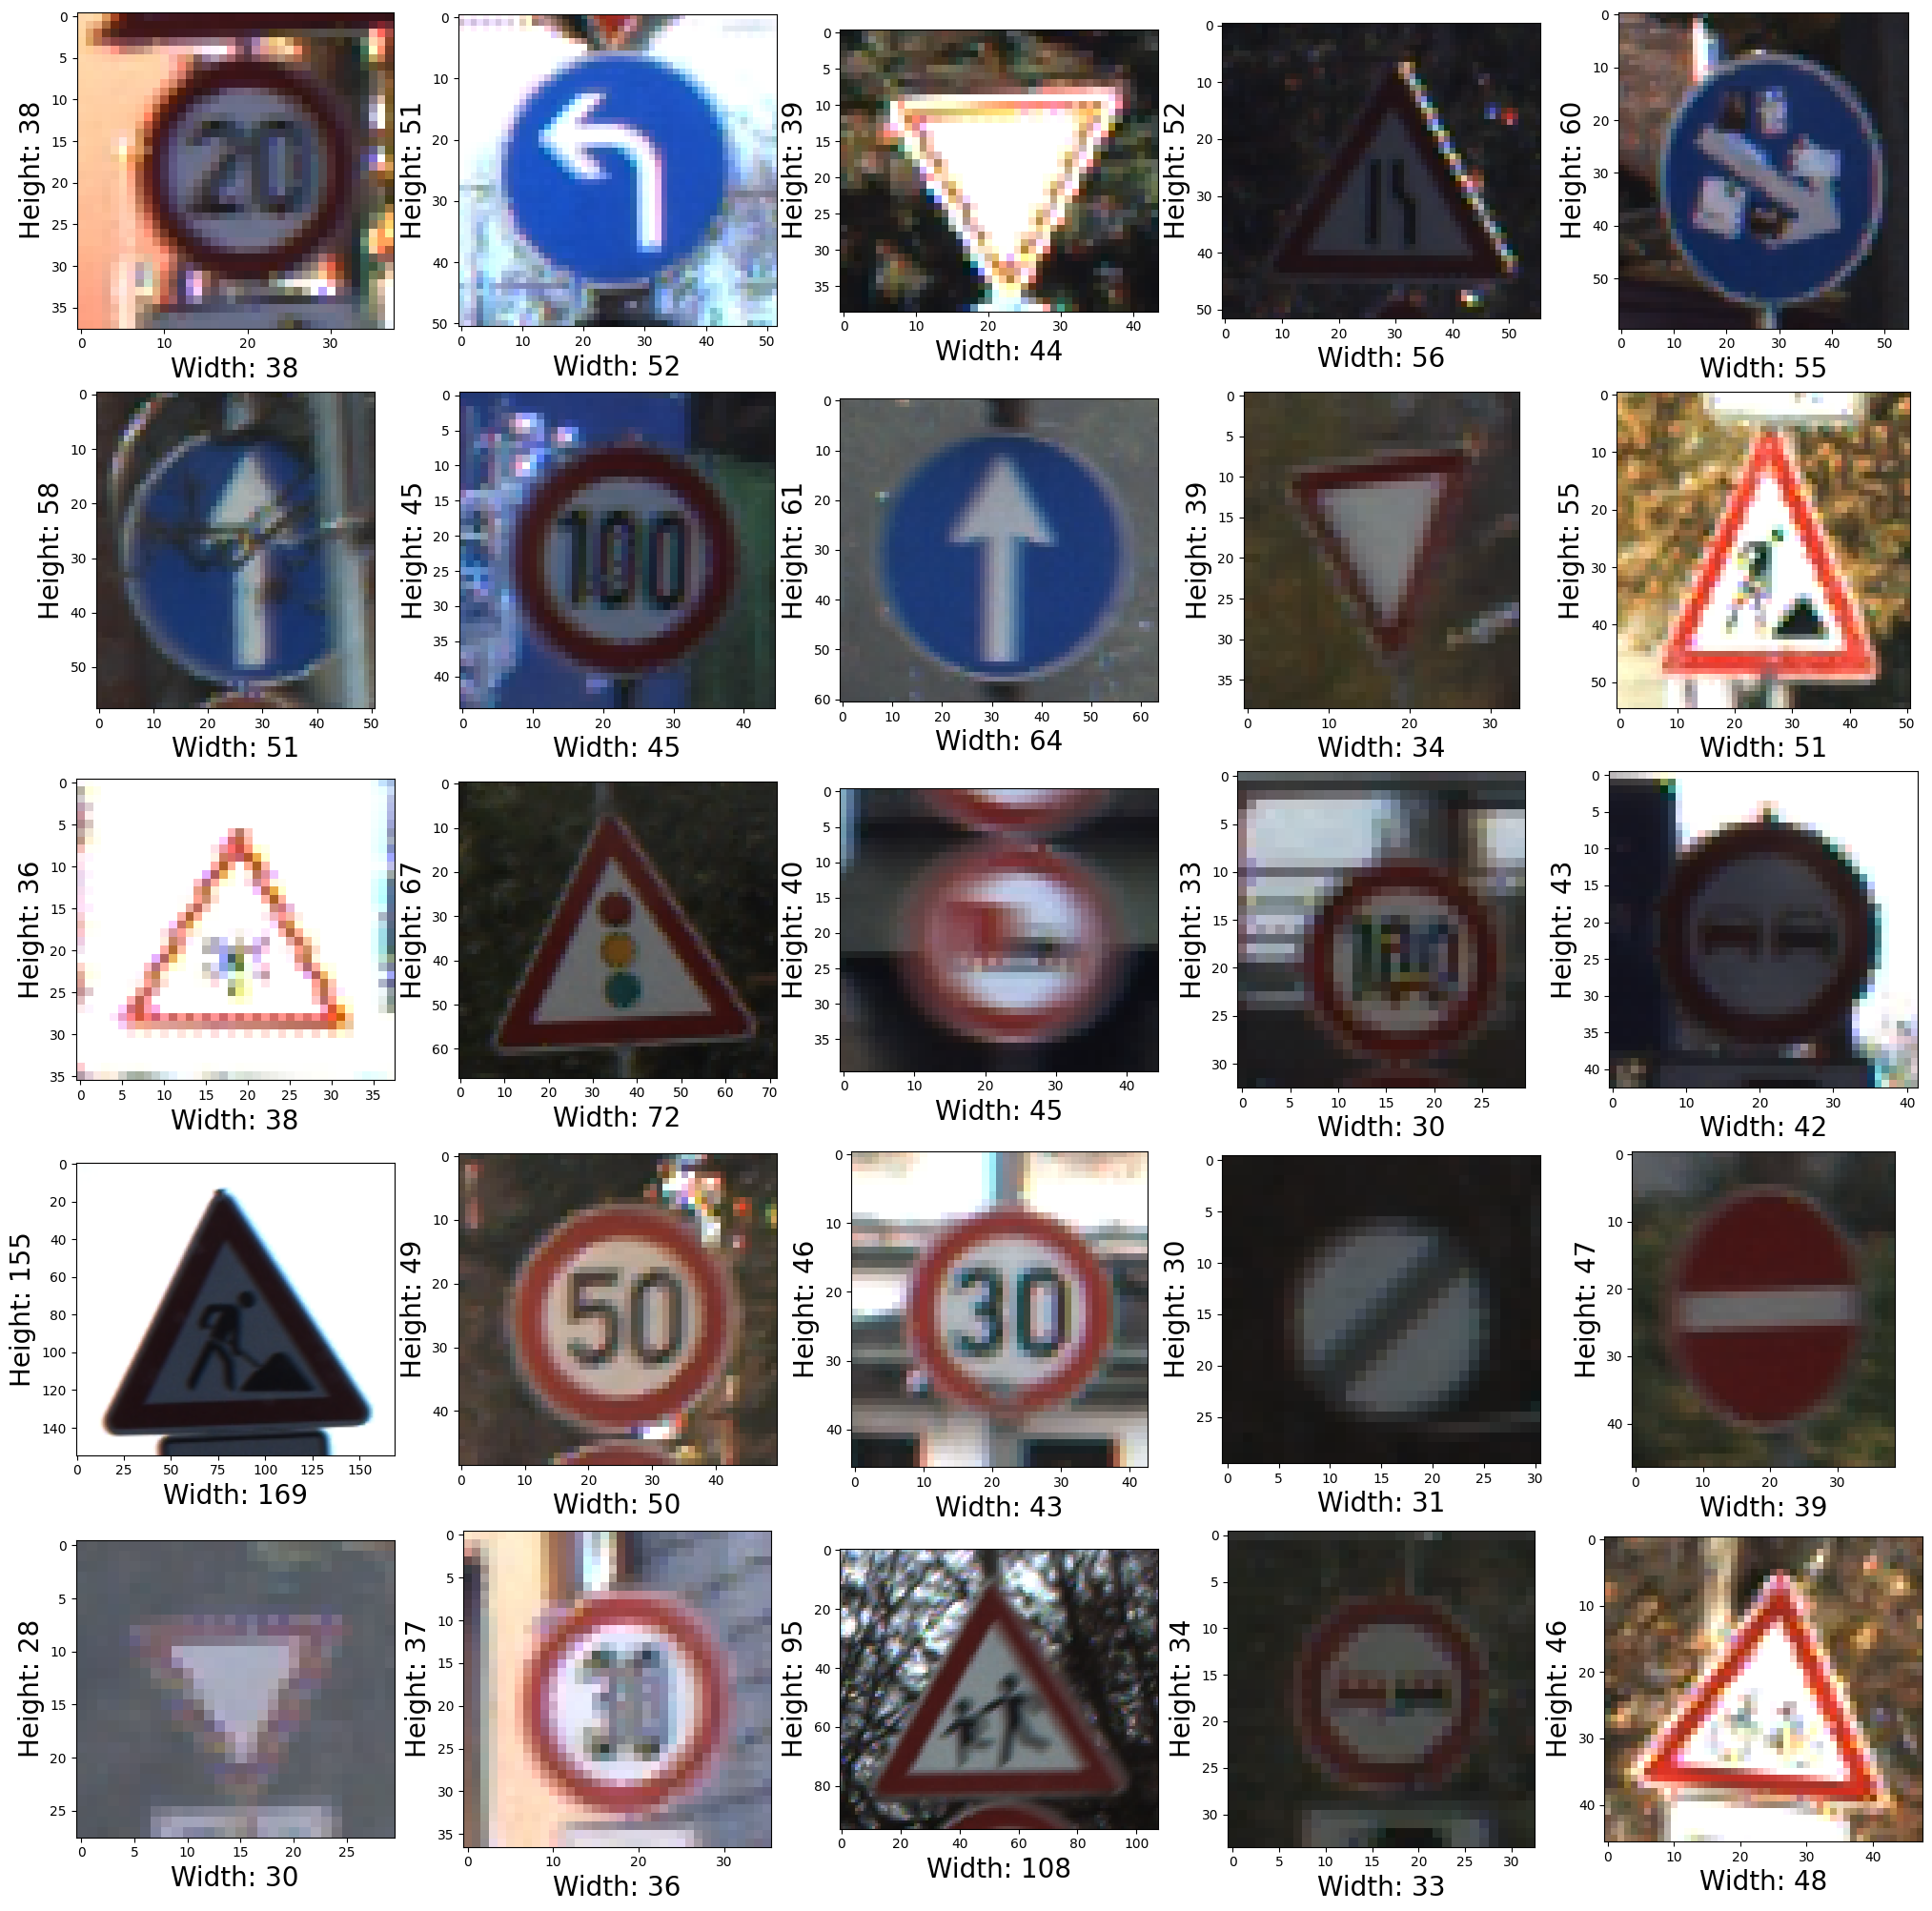

In [12]:
import random
from matplotlib.image import imread
test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    
    # Randomly choose an image path
    random_img_path = np.random.choice(imgs)
    
    # Construct the full path using os.path.join
    random_img_path = os.path.join(data_dir, random_img_path)
    
    # Attempt to read the image
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(visible=False)
    plt.xlabel("Width: {}".format(rand_img.shape[1]), fontsize=20)
    plt.ylabel("Height: {}".format(rand_img.shape[0]), fontsize=20)

plt.show()

# Loading data from Train folder

In [13]:
def load_data(data_dir):
   
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels

In [14]:
images, labels = load_data(train_path)

# Using Categorical for Classification

In [15]:
labels = to_categorical(labels)


# Splitting the dataset into training and test set

In [16]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images),labels,test_size=0.3 , random_state=42, shuffle=True)

In [17]:
print("X_train.shape", x_train.shape)
print("X_valid.shape", x_test.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_test.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446, 43)
y_valid.shape (11763, 43)


# Creating the Model

In [18]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu", input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         73856     
                                                      

# Converting Images and Class Names into Numpy Array

In [20]:
imgs_path = 'C:/Users/hp/Desktop/Projects/Python-Project-Traffic-Sign-Classification/Traffic sign classification/Train'
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((30,30))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)
print(data)

[[[[ 75  78  80]
   [ 74  76  78]
   [ 85  86  84]
   ...
   [ 68  75  74]
   [ 65  69  68]
   [ 66  67  66]]

  [[ 83  84  86]
   [ 80  80  82]
   [ 88  88  83]
   ...
   [ 73  77  78]
   [ 76  78  75]
   [ 80  80  78]]

  [[ 78  78  80]
   [ 86  85  86]
   [ 90  89  90]
   ...
   [ 71  74  71]
   [ 73  74  69]
   [ 78  78  74]]

  ...

  [[133 134 139]
   [123 127 132]
   [112 121 125]
   ...
   [ 94  95  89]
   [ 97  98  91]
   [ 99 103  99]]

  [[ 91  95  99]
   [ 91  98 103]
   [ 75  86  90]
   ...
   [104 102  96]
   [110 113 104]
   [ 96 104  98]]

  [[ 85  84  87]
   [ 95 101 107]
   [ 63  76  81]
   ...
   [103 103  95]
   [ 99 102  90]
   [ 90  97  89]]]


 [[[ 69  73  73]
   [ 76  79  79]
   [ 75  77  77]
   ...
   [ 76  81  80]
   [ 71  77  77]
   [ 66  68  70]]

  [[ 65  69  69]
   [ 74  76  76]
   [ 84  84  83]
   ...
   [ 90  83  89]
   [ 74  79  84]
   [ 67  69  73]]

  [[ 63  68  68]
   [ 71  72  72]
   [ 81  79  77]
   ...
   [105  86  91]
   [ 71  75  76]
   [ 69  71

# Converting Categorical labels into Numerical Format

In [21]:
def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

X, y = prep_dataset(data,labels)

# Splitting Data Set

In [22]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)
X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val, test_size=0.5, shuffle=True)

# Fitting the Model

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history= model.fit(X_train,Y_train, epochs=15, batch_size=64, validation_data=(X_val,Y_val))


Epoch 1/15


491/491 [==============================] - 38s 71ms/step - loss: 1.9153 - accuracy: 0.5955 - val_loss: 0.2399 - val_accuracy: 0.9413
Epoch 2/15
491/491 [==============================] - 32s 65ms/step - loss: 0.3481 - accuracy: 0.9018 - val_loss: 0.0682 - val_accuracy: 0.9839
Epoch 3/15
491/491 [==============================] - 34s 69ms/step - loss: 0.1993 - accuracy: 0.9436 - val_loss: 0.0787 - val_accuracy: 0.9793
Epoch 4/15
491/491 [==============================] - 32s 66ms/step - loss: 0.1557 - accuracy: 0.9559 - val_loss: 0.0263 - val_accuracy: 0.9926
Epoch 5/15
491/491 [==============================] - 31s 63ms/step - loss: 0.1266 - accuracy: 0.9650 - val_loss: 0.0226 - val_accuracy: 0.9941
Epoch 6/15
491/491 [==============================] - 36s 73ms/step - loss: 0.1173 - accuracy: 0.9656 - val_loss: 0.0250 - val_accuracy: 0.9941
Epoch 7/15
491/491 [==============================] - 35s 72ms/step - loss: 0.1031 - accuracy: 0.9706 - val_loss: 0.0285 - val_accura

# Finding the Predictions on Test Set

In [25]:
loss, accuracy = model.evaluate(x_test, y_test)

print('test set accuracy: ', accuracy * 100)

368/368 [==============================] - 4s 11ms/step - loss: 0.0404 - accuracy: 0.9884
test set accuracy:  98.84383082389832


# Plotting Accuracy and loss Values

Figure(1200x1000)
[<Axes: title={'center': 'Accuracy'}> <Axes: title={'center': 'Loss'}>]


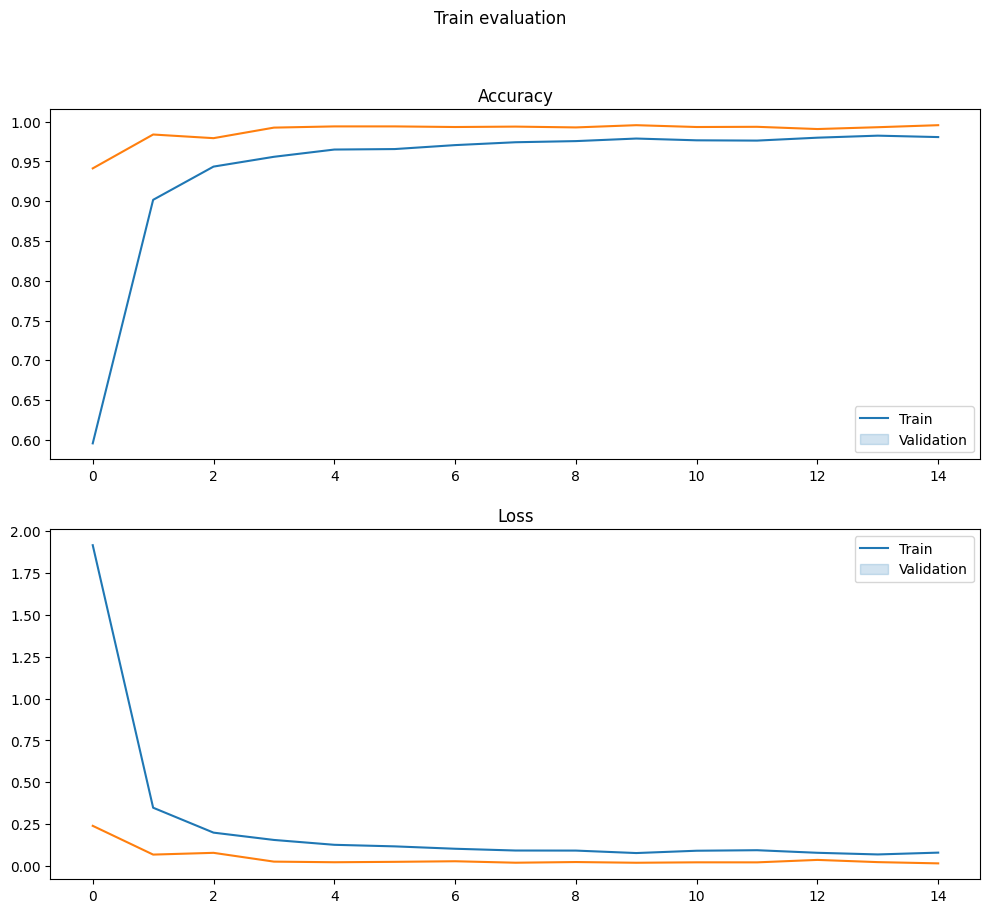

In [24]:
import seaborn as sns
fig,ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')
print(fig)
print(ax)

# Finding The Predictions on Test Data

In [28]:
from sklearn.metrics import accuracy_score
import pandas as pd
test_path = 'C:/Users/hp/Desktop/Projects/Python-Project-Traffic-Sign-Classification/Traffic sign classification/'
Y_test = pd.read_csv(test_path + 'Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

output = list()
for img in test_images:
    image = load_img(os.path.join(test_path, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
pred = model.predict(X_test)
pred=np.argmax(pred, axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

395/395 [==============================] - 5s 11ms/step
Test Data accuracy:  96.26286619160729


# Visualize Predictions

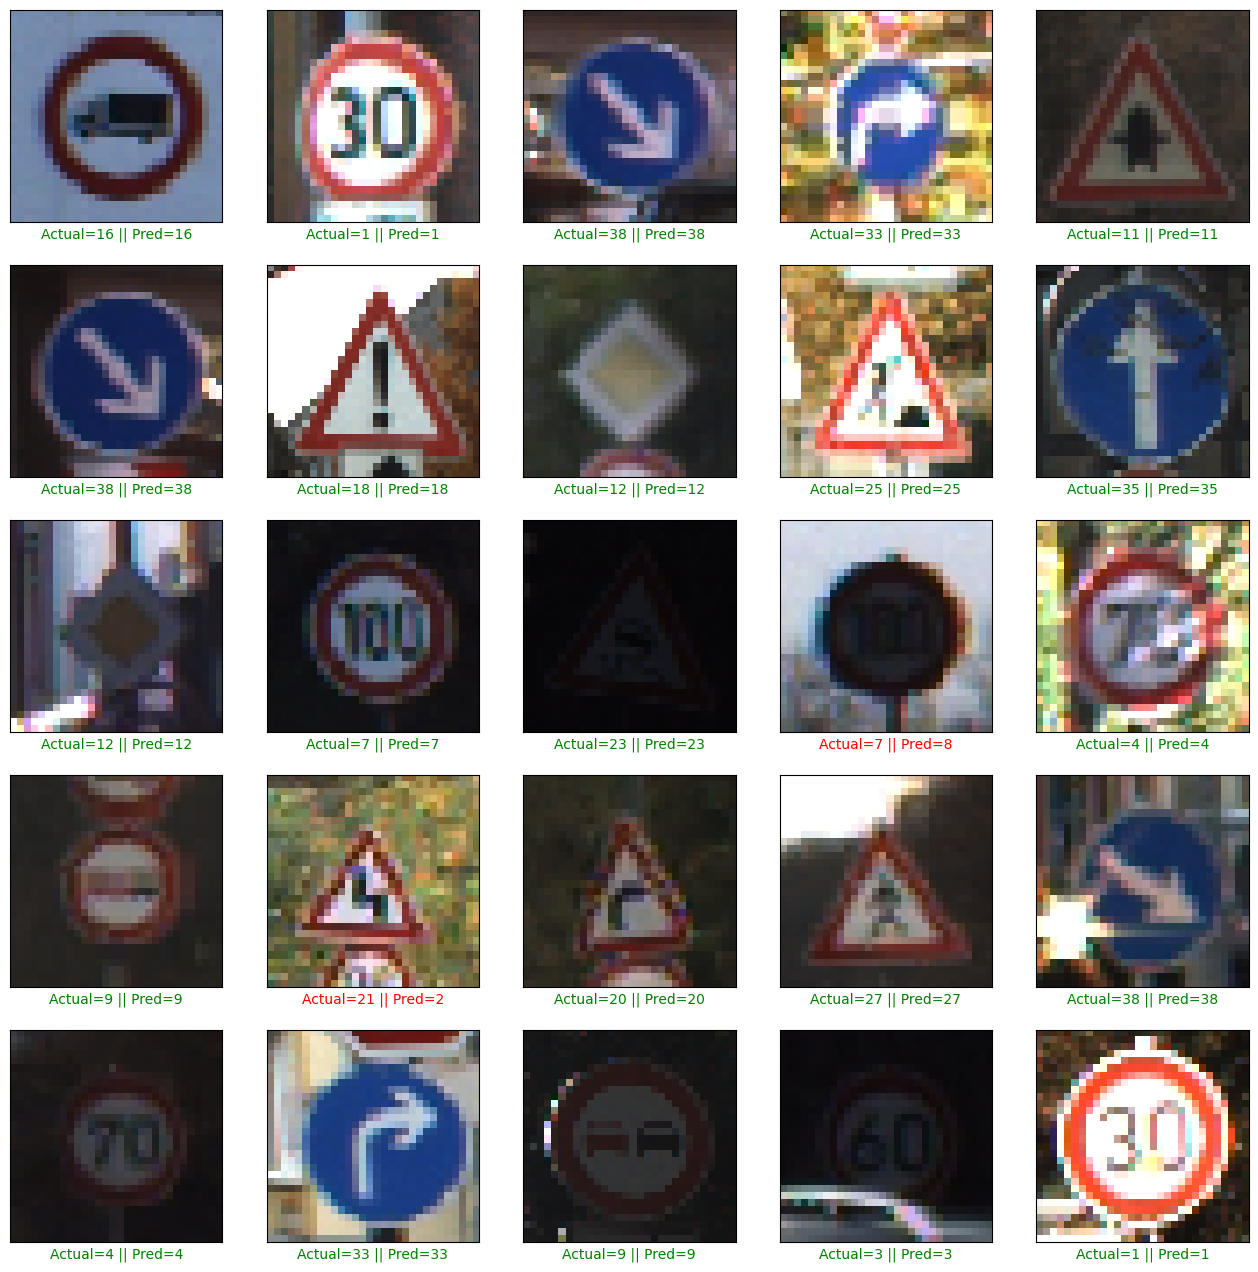

In [29]:
plt.figure(figsize = (16, 16))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

# Confusion Matrix based on True labels and Prediction Labels

<Axes: >

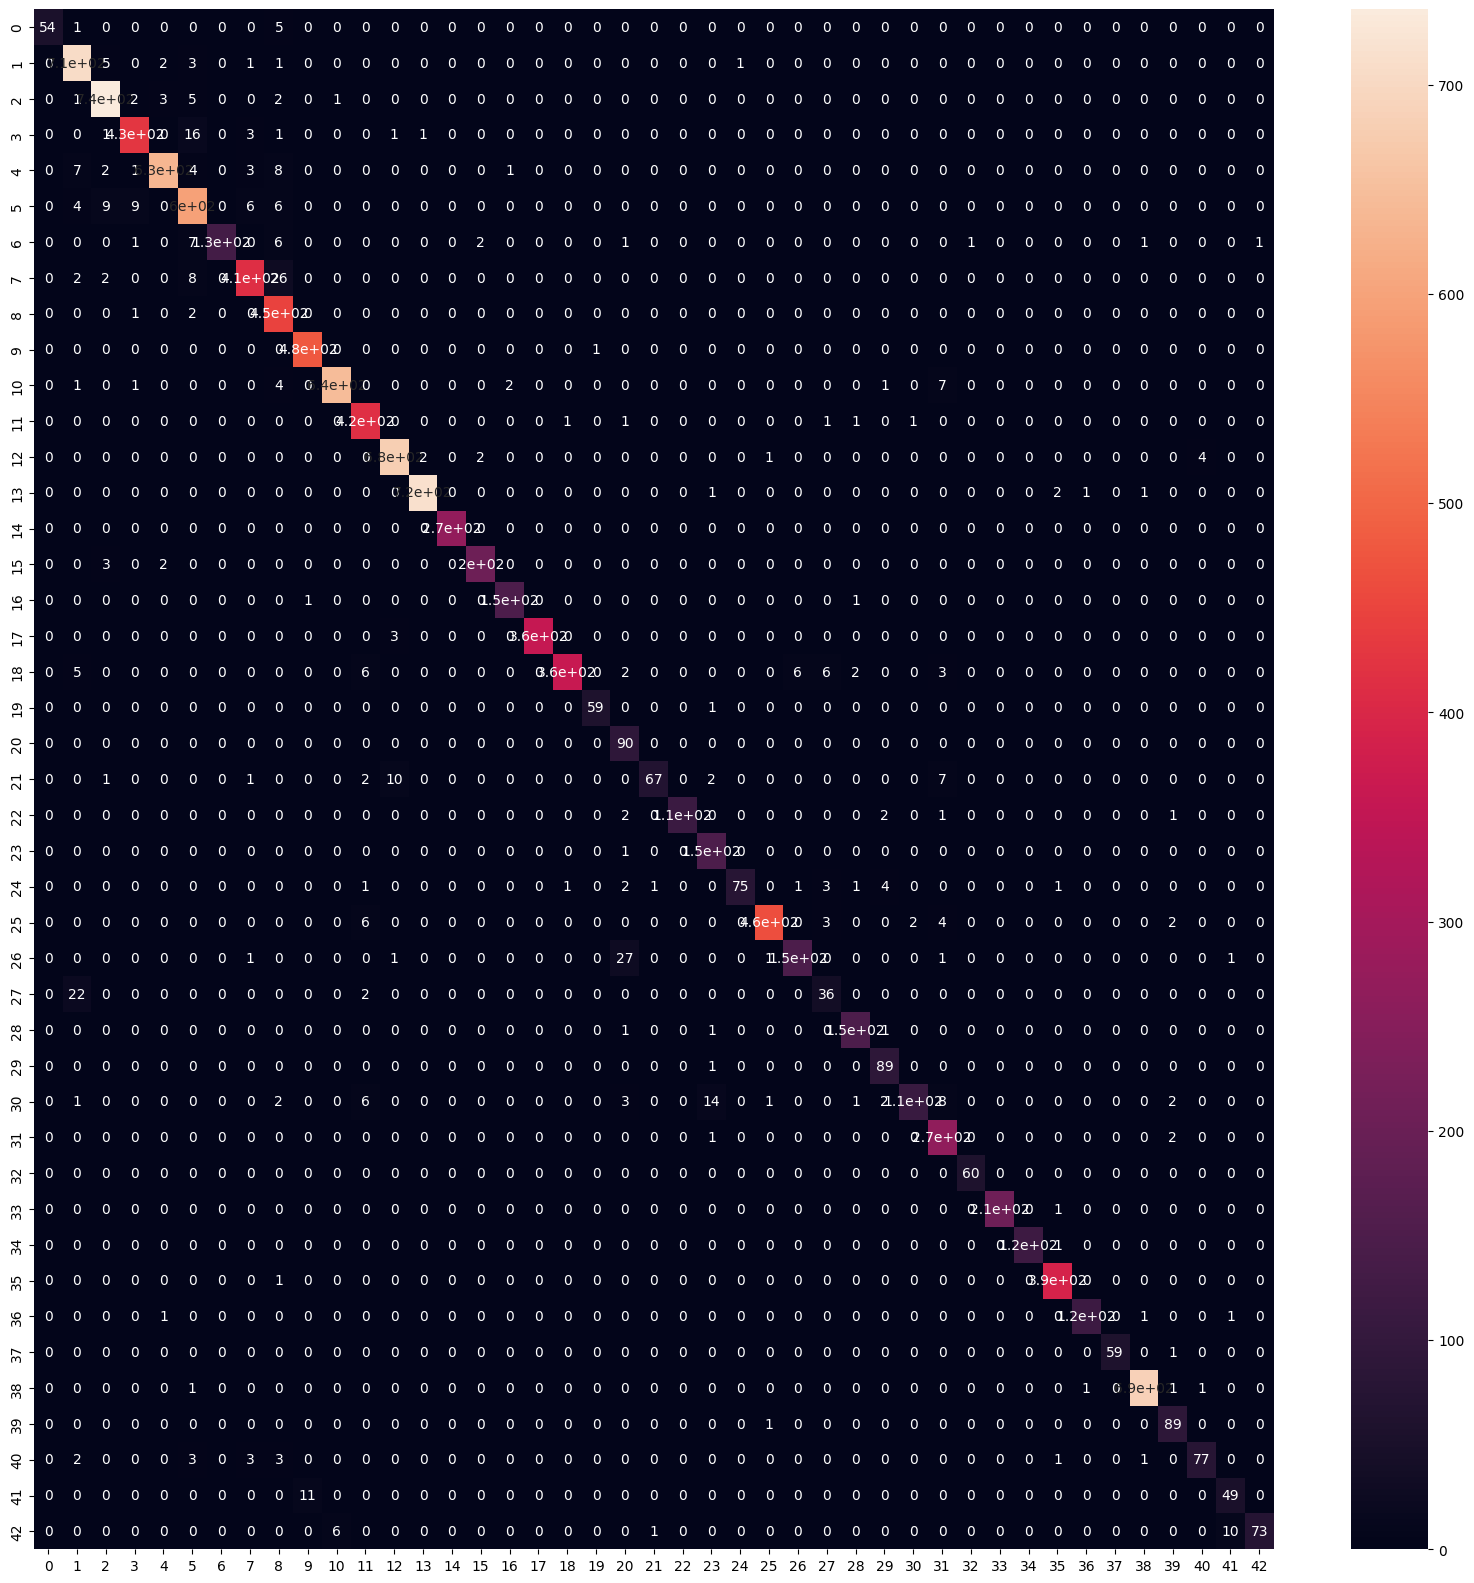

In [30]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test_labels,pred )
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)